<a href="https://colab.research.google.com/github/orange-hour/codestates_projects/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd /content/drive/MyDrive/sample_data

/content/drive/MyDrive/sample_data


In [4]:
df = pd.read_csv('vgames2.csv', index_col=0)

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [8]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [9]:
df = df.astype({'Year' : object})

In [10]:
# 중복값 확인
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [11]:
# 중복값 제거
df_clean = df.drop_duplicates()
df_clean.reset_index(inplace=True, drop=True)  #index reset

In [12]:
df_clean[df_clean.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


### 판매량 단위 통일 
(float은 1,000,000(million)단위, K = 1000)

1)K가 들어있는 값 replace하기  
2)M이 들어있는 값 replace하기  
3)나머지 판매량 (float) 에 1,000,000 곱해주기

In [13]:
import re  #정규표현식 이용

In [14]:
# K가 들어있는 값을 index에 저장하고, 해당 값들에서 K를 제거하고 0.001 곱해주기
# K을 포함하는 행의 index만 추출
index_k_na = df_clean[df_clean['NA_Sales'].str.count('K')>0]['NA_Sales'].index
index_k_eu = df_clean[df_clean['EU_Sales'].str.count('K')>0]['EU_Sales'].index
index_k_other = df_clean[df_clean['Other_Sales'].str.count('K')>0]['Other_Sales'].index
index_k_jp = df_clean[df_clean['JP_Sales'].str.count('K')>0]['JP_Sales'].index

In [15]:
#원본 데이터 보존
df_clean2 = df_clean.copy()

In [16]:
#column별로 K 들어간 값만 확인 후 0.001 곱해주기 (단위를 million으로 통일하기)

df_clean2['NA_Sales'].iloc[index_k_na] = df_clean2['NA_Sales'].iloc[index_k_na].str.replace('K', '', regex=True).astype('float')*0.001
df_clean2['EU_Sales'].iloc[index_k_eu] = df_clean2['EU_Sales'].iloc[index_k_eu].str.replace('K', '', regex=True).astype('float')*0.001
df_clean2['JP_Sales'].iloc[index_k_jp] = df_clean2['JP_Sales'].iloc[index_k_jp].str.replace('K', '', regex=True).astype('float')*0.001
df_clean2['Other_Sales'].iloc[index_k_other] = df_clean2['Other_Sales'].iloc[index_k_other].str.replace('K', '', regex=True).astype('float')*0.001

In [17]:
#원본 데이터와 비교

df_clean2['Other_Sales'].iloc[index_k_other]

245      0.01
280       0.0
399      0.03
642      0.03
874      0.01
         ... 
15719    0.27
16142    0.07
16277    0.05
16387     0.0
16590    0.08
Name: Other_Sales, Length: 100, dtype: object

In [18]:
df_clean['Other_Sales'].iloc[index_k_other]

245       10K
280        0K
399       30K
642       30K
874       10K
         ... 
15719    270K
16142     70K
16277     50K
16387      0K
16590     80K
Name: Other_Sales, Length: 100, dtype: object

In [19]:
#제대로 제거되었는지 확인

print(
    df_clean2['NA_Sales'].str.contains('K', case=False).sum(),
    df_clean2['EU_Sales'].str.contains('K', case=False).sum(),
    df_clean2['Other_Sales'].str.contains('K', case=False).sum(),
    df_clean2['JP_Sales'].str.contains('K', case=False).sum()
)

0 0 0 0


In [20]:
# M을 포함하는 행의 index만 추출
index_m_na = df_clean[df_clean['NA_Sales'].str.count('M')>0]['NA_Sales'].index
index_m_eu = df_clean[df_clean['EU_Sales'].str.count('M')>0]['EU_Sales'].index
index_m_other = df_clean[df_clean['Other_Sales'].str.count('M')>0]['Other_Sales'].index
index_m_jp = df_clean[df_clean['JP_Sales'].str.count('M')>0]['JP_Sales'].index

In [21]:
df_clean['NA_Sales'].iloc[index_m_na]

447      0.58M
458      0.25M
577      5.55M
625      0.14M
672      1.23M
         ...  
15985       0M
16151       0M
16168    0.45M
16407    0.53M
16481       0M
Name: NA_Sales, Length: 100, dtype: object

In [22]:
#column별로 M 들어간 값만 확인 후 제거

df_clean2['NA_Sales'].iloc[index_m_na] = df_clean2['NA_Sales'].iloc[index_m_na].str.replace('M', '', regex=True)
df_clean2['EU_Sales'].iloc[index_m_eu] = df_clean2['EU_Sales'].iloc[index_m_eu].str.replace('M', '', regex=True)
df_clean2['JP_Sales'].iloc[index_m_jp] = df_clean2['JP_Sales'].iloc[index_m_jp].str.replace('M', '', regex=True)
df_clean2['Other_Sales'].iloc[index_m_other] = df_clean2['Other_Sales'].iloc[index_m_other].str.replace('M', '', regex=True)

In [23]:
# M이 잘 제거되었는지 확인

print(
    df_clean2['NA_Sales'].str.contains('M', case=False).sum(),
    df_clean2['EU_Sales'].str.contains('M', case=False).sum(),
    df_clean2['JP_Sales'].str.contains('M', case=False).sum(),
    df_clean2['Other_Sales'].str.contains('M', case=False).sum()
)

0 0 0 0


In [24]:
# Sales 데이터 float으로 변환
df_clean2 = df_clean2.astype({'NA_Sales' : float, 'EU_Sales' : float, 'Other_Sales' : float, 'JP_Sales' : float})

In [25]:
df_clean2.dtypes

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [26]:
# Sales 데이터 1000000(백만) 곱해주기

df_clean2['NA_Sales'] = df_clean2['NA_Sales']*1000000
df_clean2['EU_Sales'] = df_clean2['EU_Sales']*1000000
df_clean2['JP_Sales'] = df_clean2['JP_Sales']*1000000
df_clean2['Other_Sales'] = df_clean2['Other_Sales']*1000000

In [27]:
df_clean2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


## 1. 지역에 따라서 선호하는 게임 장르가 다를까?

* 지역별 평균 판매량이 가장 높은 장르

In [28]:
df_clean2.groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264692.889561,157990.922844,47776.096823,56414.523449
Adventure,82546.875000,50039.062500,40585.937500,13132.812500
Fighting,263518.299882,119504.132231,103116.883117,43258.559622
Misc,235322.952710,122468.281430,60709.342561,42698.961938
Platform,505022.624434,228065.610860,147794.117647,58291.855204
Puzzle,213408.304498,87768.166090,98391.003460,21660.899654
Racing,287361.222848,190748.189863,45374.094932,62027.353178
Role-Playing,215468.644639,123789.615644,232602.832097,38408.631153
Shooter,445233.358837,239517.980107,29273.144606,78538.638103


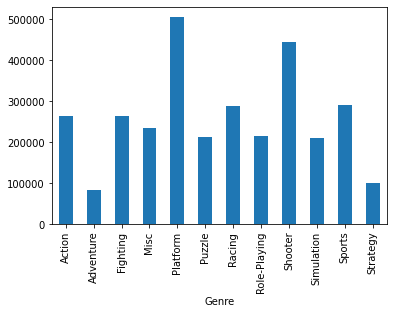

In [29]:
df_clean2['NA_Sales'].groupby(df_clean2['Genre']).mean().plot.bar()
plt.show()

In [30]:
df_grouped = df_clean2.groupby(df_clean2['Genre']).mean()

In [31]:
df_grouped['NA_Sales']

Genre
Action          264692.889561
Adventure        82546.875000
Fighting        263518.299882
Misc            235322.952710
Platform        505022.624434
Puzzle          213408.304498
Racing          287361.222848
Role-Playing    215468.644639
Shooter         445233.358837
Simulation      211514.450867
Sports          290696.283639
Strategy        101029.411765
Name: NA_Sales, dtype: float64

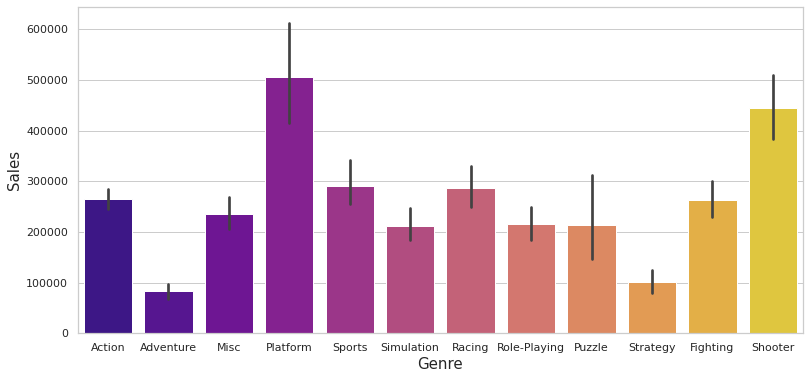

In [32]:
import seaborn as sns

plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x= 'Genre', y='NA_Sales',data=df_clean2, 
            palette ='plasma')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)

plt.show()

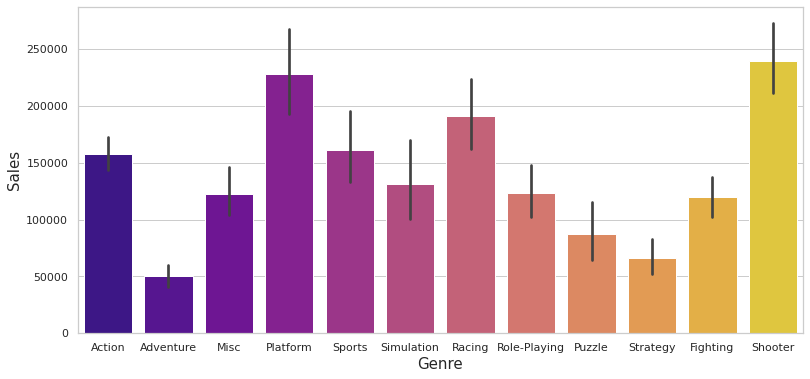

In [33]:
plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x= 'Genre', y='EU_Sales',data=df_clean2, 
            palette ='plasma')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)

plt.show()

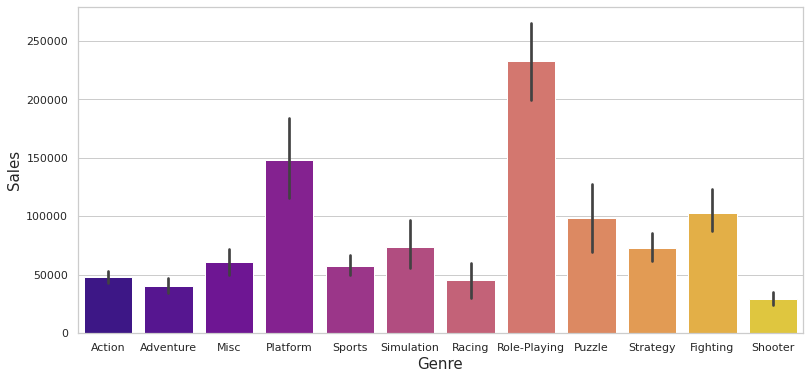

In [34]:
plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x= 'Genre', y='JP_Sales',data=df_clean2, 
            palette ='plasma')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)

plt.show()

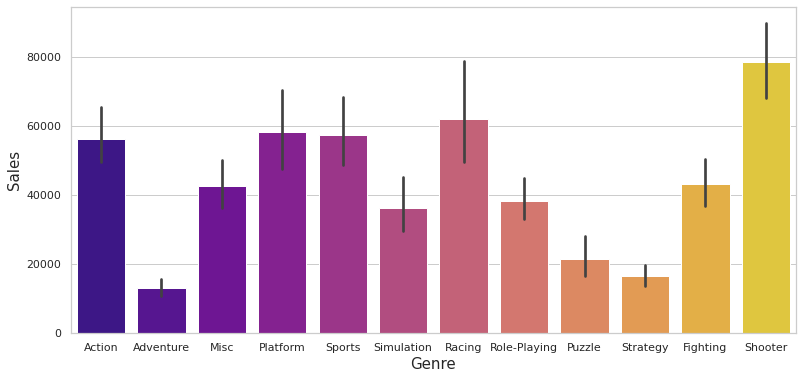

In [35]:
plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x= 'Genre', y='Other_Sales',data=df_clean2, 
            palette ='plasma')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)

plt.show()

In [36]:
df_genre_na = df_clean2.groupby(by=['Genre'])['NA_Sales'].mean()
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df_clean2.groupby(by=['Genre'])['EU_Sales'].mean()
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df_clean2.groupby(by=['Genre'])['JP_Sales'].mean()
df_genre_jp = df_genre_jp.reset_index()

df_genre_other = df_clean2.groupby(by=['Genre'])['Other_Sales'].mean()
df_genre_other = df_genre_other.reset_index()

df_genre_mean = df_genre_na.combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_other)
df_genre_mean = df_genre_mean.set_index("Genre")

df_genre_mean

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,
Action,157990.922844,47776.096823,264692.889561,56414.523449
Adventure,50039.062500,40585.937500,82546.875000,13132.812500
Fighting,119504.132231,103116.883117,263518.299882,43258.559622
Misc,122468.281430,60709.342561,235322.952710,42698.961938
Platform,228065.610860,147794.117647,505022.624434,58291.855204
Puzzle,87768.166090,98391.003460,213408.304498,21660.899654
Racing,190748.189863,45374.094932,287361.222848,62027.353178
Role-Playing,123789.615644,232602.832097,215468.644639,38408.631153
Shooter,239517.980107,29273.144606,445233.358837,78538.638103


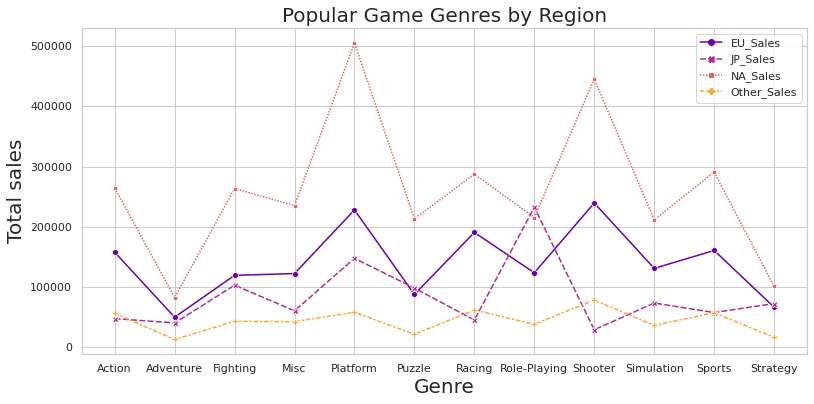

In [82]:
plt.figure(figsize=(13, 6))
plt.title("Popular Game Genres by Region", fontsize=20)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Total sales", fontsize=20)

sns.lineplot(data=df_genre_mean, markers=True, palette ='plasma', estimator='mean')
plt.show()

## 2. 연도별 게임의 트렌드가 있을까?

* 연도별 게임 플랫폼 분석


In [38]:
df_clean2['Overall_Sales'] = df_clean2['NA_Sales'] + df_clean2['EU_Sales'] + df_clean2['JP_Sales'] + df_clean2['Other_Sales']

In [39]:
df_clean2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Overall_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [40]:
df_clean2.dtypes

Name              object
Platform          object
Year              object
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Overall_Sales    float64
dtype: object

In [41]:
df_clean2.groupby(['Year','Genre']).mean()

NA_Sales       EU_Sales       JP_Sales  \
Year   Genre                                                       
0.0    Platform       50000.000000   30000.000000       0.000000   
       Shooter        10000.000000   10000.000000       0.000000   
       Strategy           0.000000       0.000000  200000.000000   
1.0    Racing        340000.000000  270000.000000       0.000000   
       Sports        770000.000000  600000.000000       0.000000   
...                            ...            ...            ...   
2016.0 Sports        123513.513514  198918.918919   16486.486486   
       Strategy       11000.000000   32000.000000    5000.000000   
2017.0 Action             0.000000       0.000000   10000.000000   
       Role-Playing       0.000000       0.000000   20000.000000   
2020.0 Simulation    270000.000000       0.000000       0.000000   

                       Other_Sales  Overall_Sales  
Year   Genre                                       
0.0    Platform       10000.000000   9.000000e+04  
       Shooter            0.000000   2.000000e+04  
       Strategy           0.000000   2.000000e+05  
1.0    Racing         90000.000000   7.000000e+05  
       Sports        200000.000000   1.570000e+06  
...                            ...            ...  
2016.0 Sports         51891.891892   3.908108e+05  
       Strategy        4000.000000   5.200000e+04  
2017.0 Action             0.000000   1.000000e+04  
       Role-Playing       0.000000   2.000000e+04  
2020.0 Simulation     20000.000000   2.900000e+05  

[467 rows x 5 columns]

In [42]:
df_clean2.sort_values(by=['Year'], axis=0)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Overall_Sales
9275,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0,200000.0
16393,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,10000.0,10000.0,0.0,0.0,20000.0
14665,Strider 2,PS,0.0,Platform,Virgin Interactive,50000.0,30000.0,0.0,10000.0,90000.0
2249,SplashDown,PS2,1.0,Racing,Atari,340000.0,270000.0,0.0,90000.0,700000.0
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,770000.0,600000.0,0.0,200000.0,1570000.0
...,...,...,...,...,...,...,...,...,...,...
16239,Freaky Flyers,GC,NaN,Racing,Unknown,10000.0,0.0,0.0,0.0,10000.0
16274,Space Invaders,2600,NaN,Shooter,Atari,2360000.0,140000.0,0.0,30000.0,2530000.0
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,700000.0,0.0,0.0,50000.0,750000.0
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,60000.0,0.0,0.0,0.0,60000.0


In [43]:
df_clean2['Year'].value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [44]:
year_cleaned = df_clean2.dropna(subset=['Year'])
year_cleaned2 = year_cleaned.loc[year_cleaned['Year']>1500,]

In [45]:
year_cleaned2.groupby(['Year','Genre'])['Overall_Sales'].mean()

Year    Genre       
1980.0  Action          3.400000e+05
        Fighting        7.700000e+05
        Misc            6.750000e+05
        Shooter         3.535000e+06
1981.0  Action          5.916000e+05
                            ...     
2016.0  Sports          3.908108e+05
        Strategy        5.200000e+04
2017.0  Action          1.000000e+04
        Role-Playing    2.000000e+04
2020.0  Simulation      2.900000e+05
Name: Overall_Sales, Length: 388, dtype: float64

In [46]:
year_cleaned2['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [47]:
genres = year_cleaned2['Genre'].dropna().unique().tolist()
genres

['Action',
 'Adventure',
 'Misc',
 'Platform',
 'Sports',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Strategy',
 'Fighting',
 'Shooter']

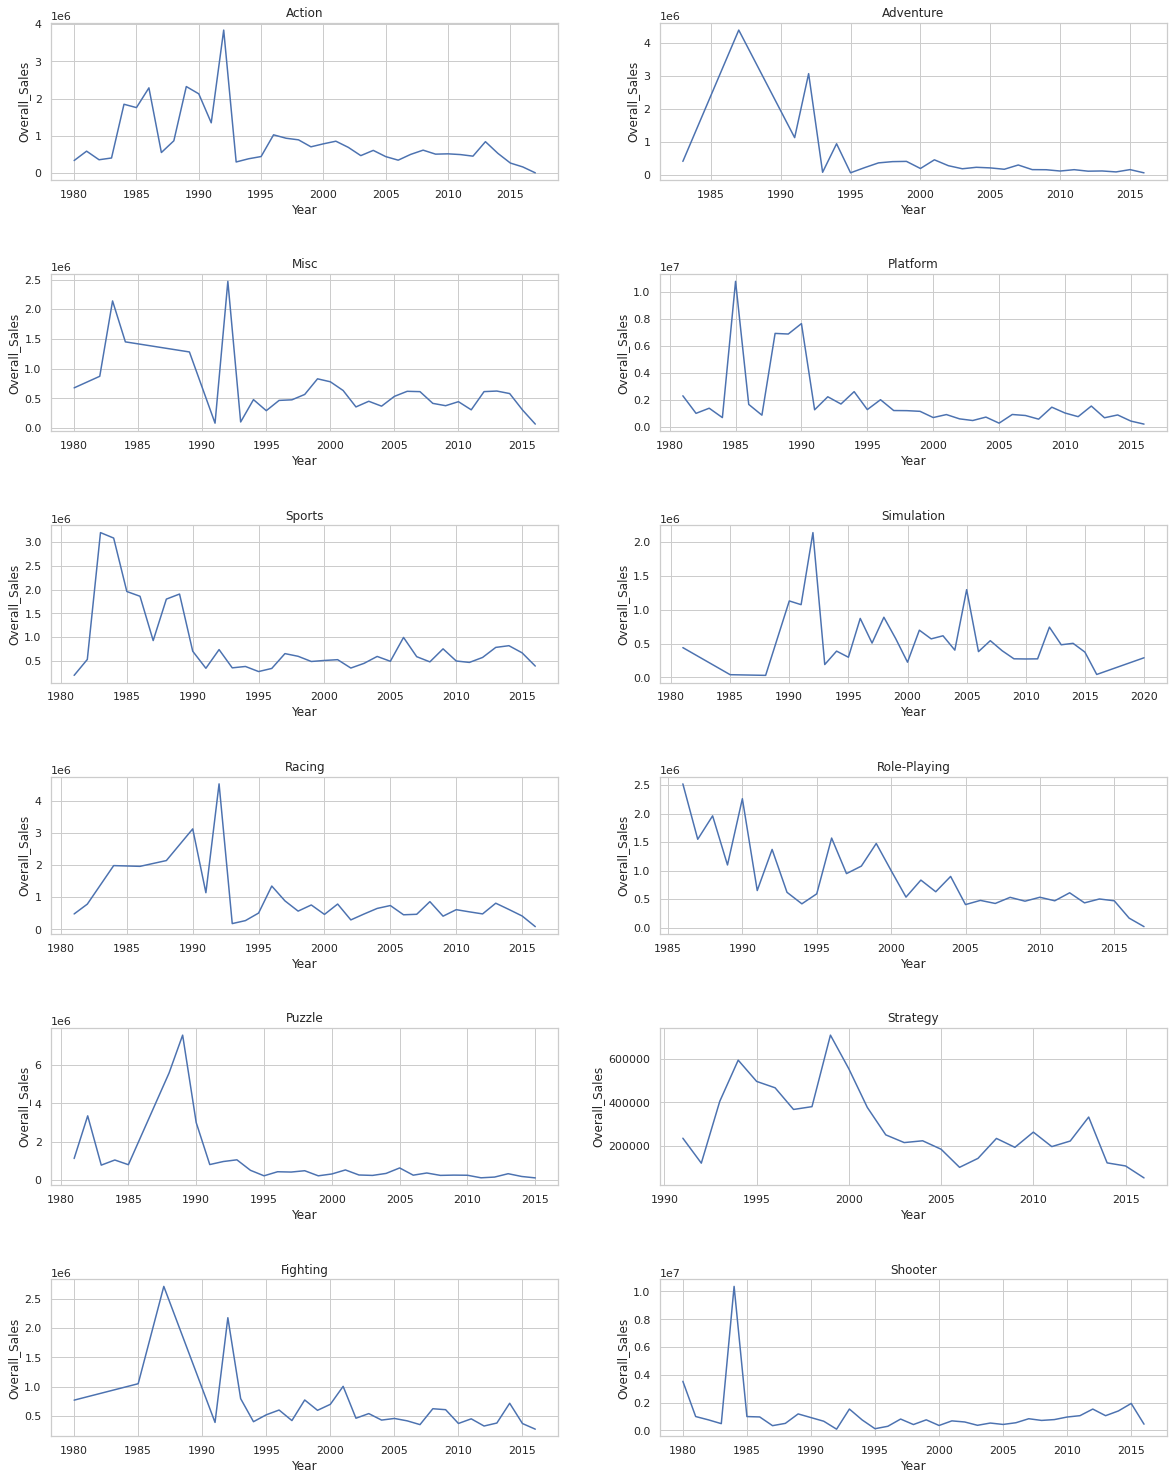

In [80]:
# 장르별 연도에 따른 출고량(판매량) 추이

fig, axes=plt.subplots(6,2, figsize=(20,26))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

sns.set_theme(style="whitegrid")

for i, name in enumerate(genres):
  axes[i//2,i%2].set_title(name)
  sns.lineplot(x='Year', y='Overall_Sales', data=year_cleaned2[year_cleaned2['Genre']==name], ci=None, ax=axes[i//2,i%2])
  
plt.savefig('Genre_type_sales.png')

plt.show()

In [49]:
year_cleaned2['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [50]:
value_cnt = year_cleaned2['Platform'].value_counts() 
value_cnt[value_cnt > 20].index.tolist()

['DS',
 'PS2',
 'PS3',
 'Wii',
 'X360',
 'PSP',
 'PS',
 'PC',
 'GBA',
 'XB',
 'GC',
 '3DS',
 'PSV',
 'PS4',
 'N64',
 'SNES',
 'XOne',
 'SAT',
 'WiiU',
 '2600',
 'NES',
 'GB',
 'DC',
 'GEN']

In [87]:
year_cleaned2[year_cleaned2['Platform']=='WiiU'].sort_values(by='Year', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Overall_Sales
6471,Minecraft,WiiU,2016.0,Misc,Microsoft Game Studios,180000.0,90000.0,140000.0,30000.0,440000.0
5057,Lego Star Wars: The Force Awakens,WiiU,2016.0,Action,Warner Bros. Interactive Entertainment,40000.0,40000.0,0.0,10000.0,90000.0
3745,Star Fox: Zero,WiiU,2016.0,Shooter,Nintendo,160000.0,100000.0,70000.0,30000.0,360000.0
12117,LEGO Marvel's Avengers,WiiU,2016.0,Action,Warner Bros. Interactive Entertainment,120000.0,90000.0,0.0,20000.0,230000.0
4442,Mighty No. 9,WiiU,2016.0,Platform,Deep Silver,10000.0,10000.0,0.0,0.0,20000.0
...,...,...,...,...,...,...,...,...,...,...
13122,NBA 2K13,WiiU,2012.0,Sports,Take-Two Interactive,80000.0,40000.0,0.0,10000.0,130000.0
13262,WipeOut 3 The Game,WiiU,2012.0,Action,Activision,120000.0,0.0,0.0,10000.0,130000.0
11094,Tank! Tank! Tank!,WiiU,2012.0,Action,Namco Bandai Games,20000.0,10000.0,50000.0,0.0,80000.0
13681,Scribblenauts: Unlimited,WiiU,2012.0,Action,Warner Bros. Interactive Entertainment,260000.0,90000.0,0.0,30000.0,380000.0


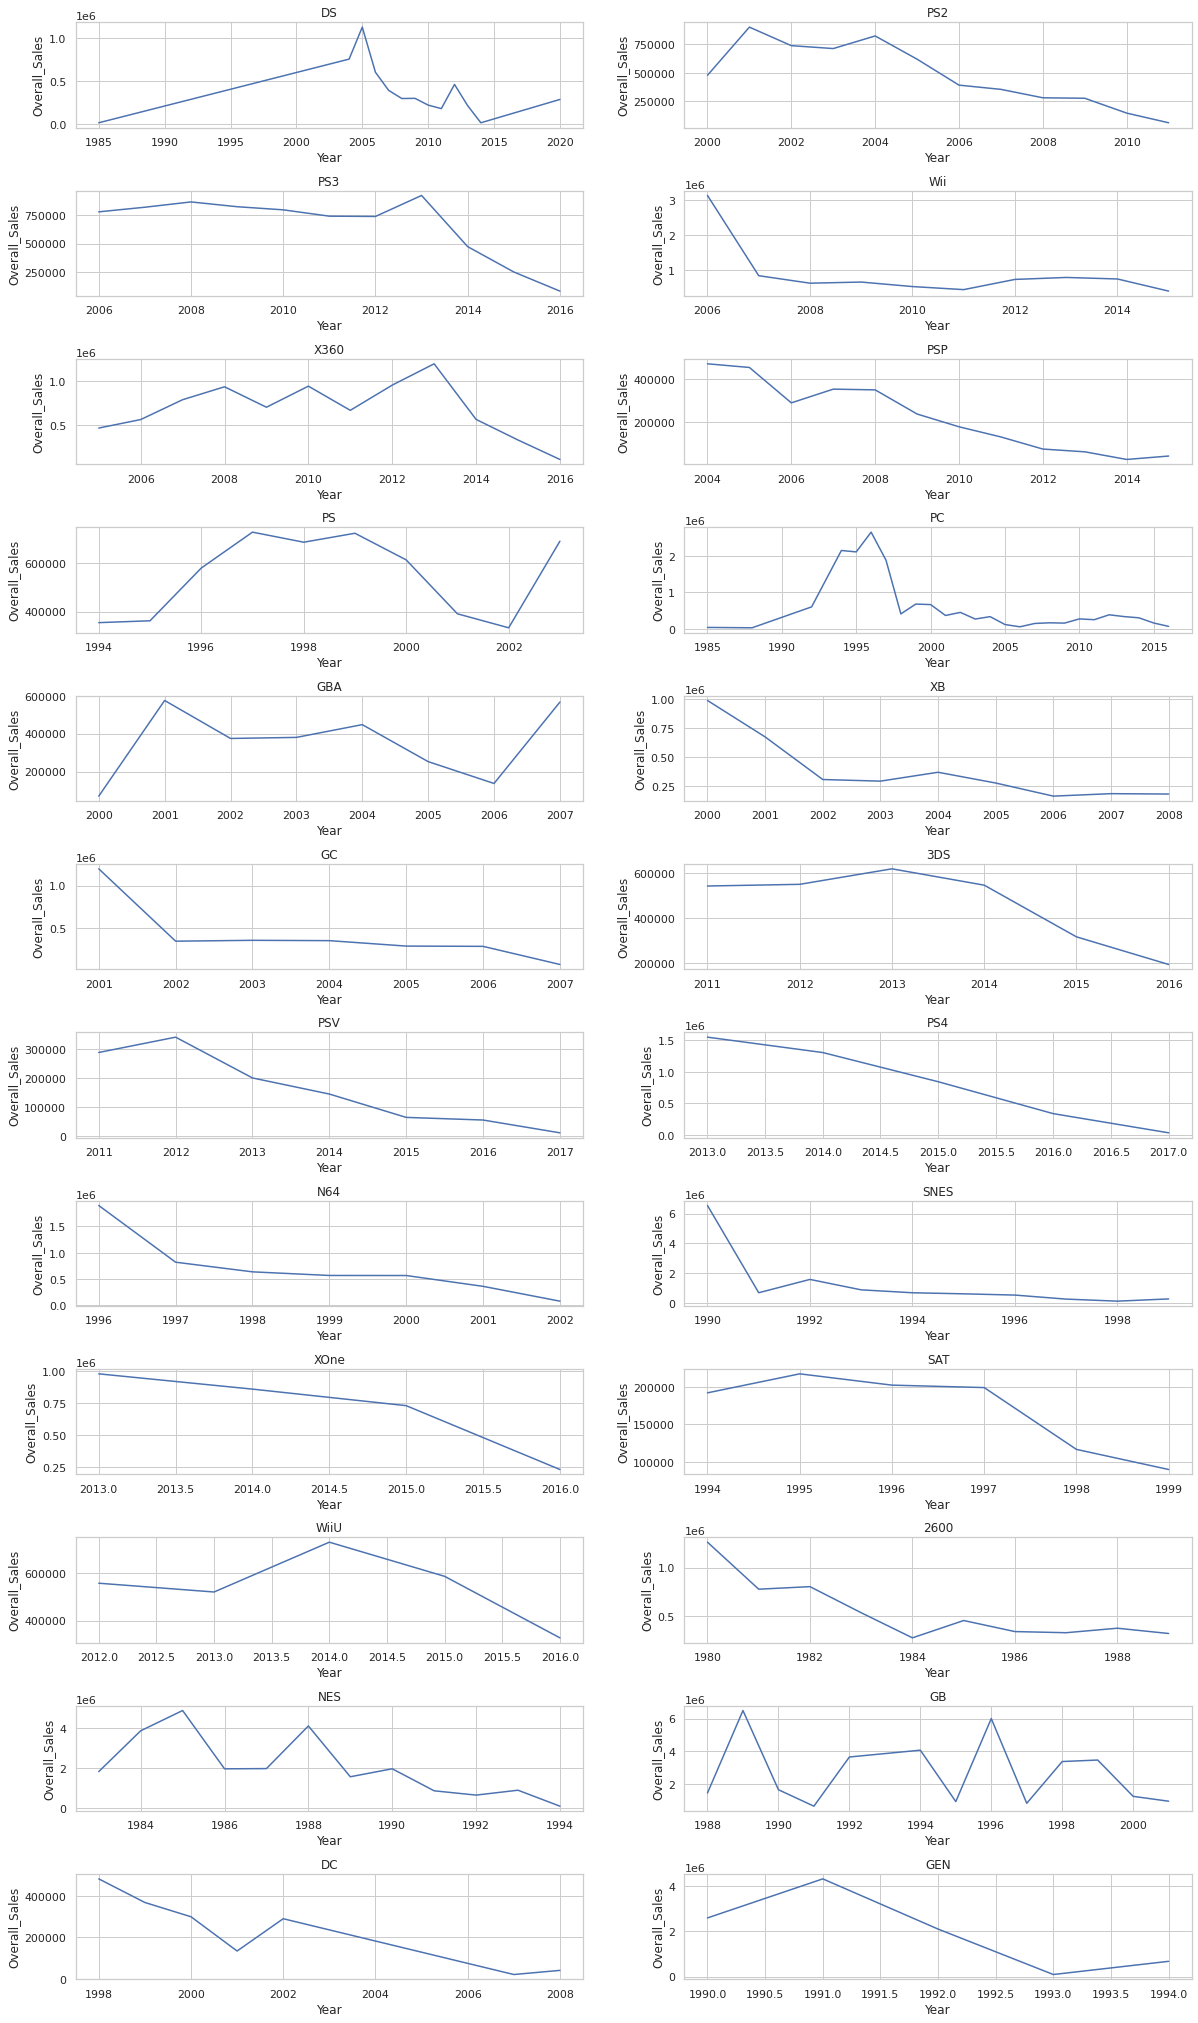

In [79]:
# 플랫폼별 연도에 따른 출고량(판매량) 추이 (20개 이상 데이터가 존재하는 플랫폼만 분석)

fig, axes=plt.subplots(12,2, figsize=(20,36))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# plt.xlim

value_cnt = year_cleaned2['Platform'].value_counts() 

sns.set_theme(style="whitegrid")

names = value_cnt[value_cnt > 20].index.tolist()

for i, name in enumerate(names):
  axes[i//2,i%2].set_title(name)
  sns.lineplot(x='Year', y='Overall_Sales', data=year_cleaned2[year_cleaned2['Platform']==name], ci=None, ax=axes[i//2,i%2])
  
plt.savefig('Platform_type_sales.png')
plt.show()



## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [55]:
#최근에는 어떤 게임이 잘 팔렸을까?

In [56]:
df_sorted_year_sales = df_clean2.sort_values(by=['Year','Overall_Sales'], axis=0, ascending=False)

In [57]:
df_sorted_year_sales.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Overall_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,270000.0,0.0,0.0,20000.0,290000.0
10106,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0
15232,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0
15480,FIFA 17,PS4,2016.0,Sports,Electronic Arts,280000.0,3750000.0,60000.0,690000.0,4780000.0
3297,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1280000.0,1610000.0,150000.0,570000.0,3610000.0
16438,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,590000.0,1160000.0,60000.0,330000.0,2140000.0
11762,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1200000.0,620000.0,0.0,180000.0,2000000.0
2870,Overwatch,PS4,2016.0,Shooter,Activision,640000.0,680000.0,140000.0,260000.0,1720000.0
8557,No Man's Sky,PS4,2016.0,Action,Hello Games,580000.0,740000.0,20000.0,260000.0,1600000.0


In [58]:
#역대 가장 잘 팔린 게임 확인

df_sorted_sales = df_clean2.sort_values(by=['Overall_Sales'], axis=0, ascending=False)

In [59]:
df_sorted_sales.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Overall_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12578,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16530,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10487,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [60]:
wii_sales = year_cleaned2[year_cleaned2['Platform'] == 'Wii'].sort_values(by='Year').groupby('Genre')['Overall_Sales'].sum()

In [61]:
#장르별 판매량의 비율 구하기

wii_sales/wii_sales.sum()

Genre
Action          0.122462
Adventure       0.020305
Fighting        0.026476
Misc            0.231224
Platform        0.100856
Puzzle          0.017269
Racing          0.067931
Role-Playing    0.015657
Shooter         0.029000
Simulation      0.040565
Sports          0.322429
Strategy        0.005827
Name: Overall_Sales, dtype: float64

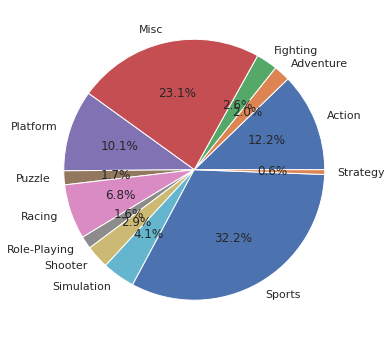

In [62]:
#플랫폼에 따른 장르별 출고량 - Wii

plt.figure(figsize=(13, 6))

labels = wii_sales.index
plt.pie(wii_sales/wii_sales.sum(), labels=labels, autopct='%.1f%%')
plt.show()

In [56]:
nes_sales = year_cleaned2[year_cleaned2['Platform'] == 'NES'].sort_values(by='Year').groupby('Genre')['Overall_Sales'].sum()

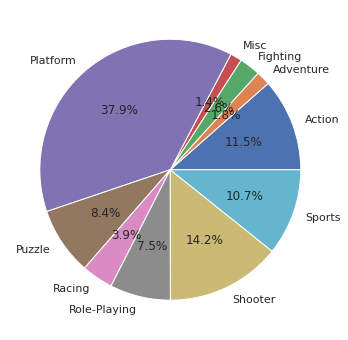

In [57]:
#플랫폼에 따른 장르별 출고량 - NES

plt.figure(figsize=(13, 6))

labels = nes_sales.index
plt.pie(nes_sales/nes_sales.sum(), labels=labels, autopct='%.1f%%')
plt.show()

In [137]:
year_cleaned2.dtypes

Name              object
Platform          object
Year              object
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Overall_Sales    float64
dtype: object

In [138]:
year_cleaned2['Year'] = year_cleaned2['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


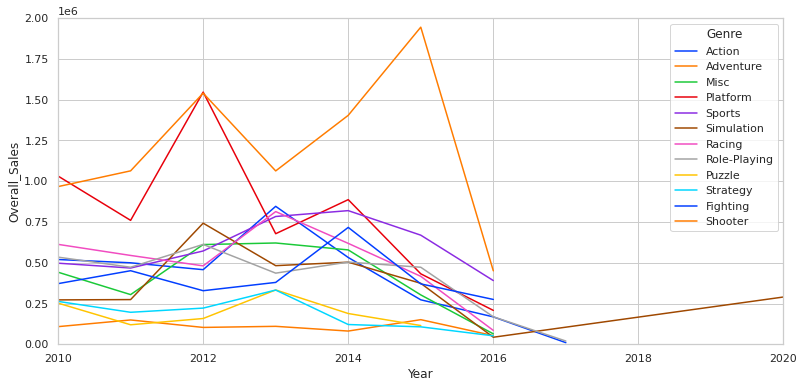

In [76]:
# 장르별 판매량 추이

plt.figure(figsize=(13, 6))
plt.xlim([2010, 2020])
plt.ylim([0, 2000000])
sns.set_theme(style="whitegrid")
sns.lineplot(x='Year', y='Overall_Sales', hue='Genre', data=year_cleaned2, markers=True, palette ='bright', ci=None)

plt.show()

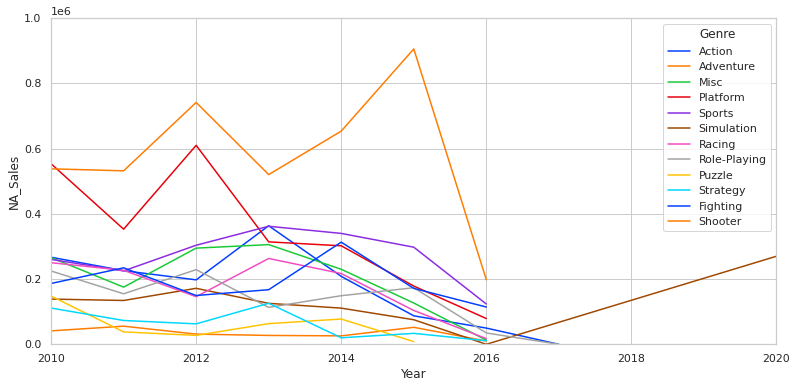

In [75]:
# 각 지역 기준 (북미/유럽/일본/그 외) 장르별 판매량 추이 (2010년 이후)
# 북아메리카

plt.figure(figsize=(13, 6))
plt.xlim([2010, 2020])
plt.ylim([0, 1000000])
sns.set_theme(style="whitegrid")
sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=year_cleaned2, markers=True, palette ='bright', estimator='mean', ci=None)

plt.show()

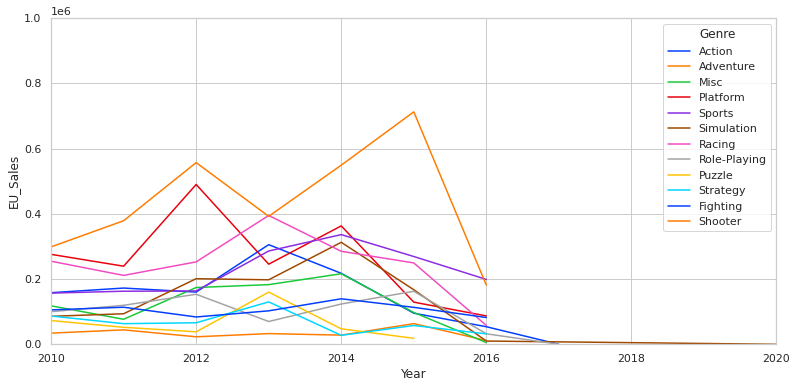

In [74]:
# 유럽

plt.figure(figsize=(13, 6))
plt.xlim([2010, 2020])
plt.ylim([0, 1000000])
sns.set_theme(style="whitegrid")
sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=year_cleaned2, markers=True, palette ='bright', estimator='mean', ci=None)

plt.show()

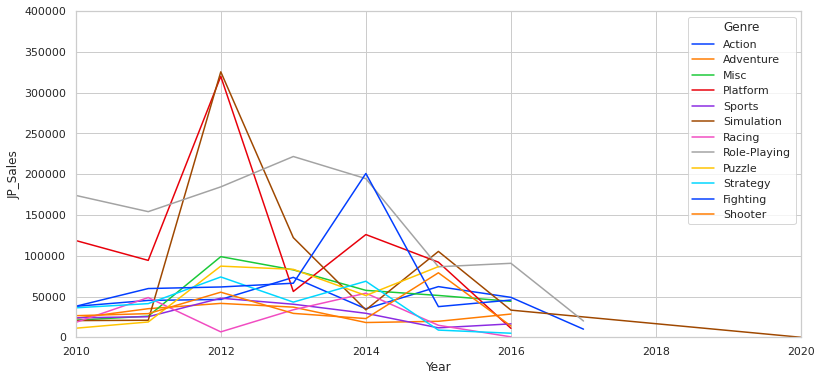

In [73]:
# 일본

plt.figure(figsize=(13, 6))
plt.xlim([2010, 2020])
plt.ylim([0, 400000])
sns.set_theme(style="whitegrid")
sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=year_cleaned2, markers=True, palette ='bright', estimator='mean', ci=None)

plt.show()

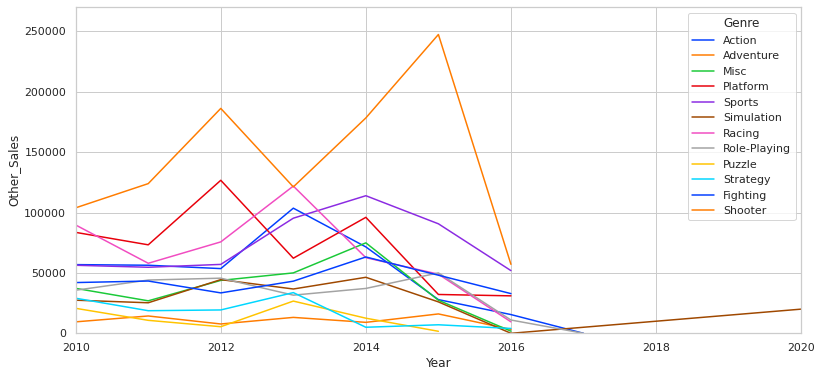

In [78]:
# 그 외

plt.figure(figsize=(13, 6))
plt.xlim([2010, 2020])
plt.ylim([0, 270000])
sns.set_theme(style="whitegrid")
sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=year_cleaned2, markers=True, palette ='bright', estimator='mean', ci=None)

plt.show()